In [1]:
import pickle
import numpy as np

In [2]:
with open("train_qa.txt","rb") as fp:
    train_data = pickle.load(fp)
    
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [3]:
with open("test_qa.txt","rb") as fp:
    test_data = pickle.load(fp)
    
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [4]:
len(test_data)
type(test_data)

list

In [5]:
len(train_data)
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [6]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [7]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [8]:
train_data[0][2]

'no'

In [9]:
#Set up vocabulary
vocab = set()

In [10]:
all_data = test_data + train_data
all_data
type(all_data)

list

In [11]:
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

vocab.add('yes')
vocab.add('no')

vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [12]:
len(vocab)
vocab_len = len(vocab) + 1

In [13]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [14]:
max_ques_len = max([len(data[1]) for data in all_data])
max_ques_len

6

In [15]:
#Vectorize
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [16]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [17]:
tokenizer = Tokenizer(filters = [])

In [18]:
tokenizer.fit_on_texts(vocab)

In [19]:
tokenizer.word_index

{'moved': 1,
 'took': 2,
 'kitchen': 3,
 'to': 4,
 'put': 5,
 'went': 6,
 'sandra': 7,
 'journeyed': 8,
 'bathroom': 9,
 'picked': 10,
 'travelled': 11,
 'mary': 12,
 'apple': 13,
 'john': 14,
 'bedroom': 15,
 'yes': 16,
 'discarded': 17,
 'milk': 18,
 'is': 19,
 'the': 20,
 '.': 21,
 'no': 22,
 'dropped': 23,
 'back': 24,
 'left': 25,
 'got': 26,
 'down': 27,
 'in': 28,
 'daniel': 29,
 'garden': 30,
 'football': 31,
 'there': 32,
 'hallway': 33,
 '?': 34,
 'grabbed': 35,
 'up': 36,
 'office': 37}

In [20]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [21]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [22]:
len(train_story_text)
len(train_story_seq)

10000

In [23]:
train_story_seq

[[12, 1, 4, 20, 9, 21, 7, 8, 4, 20, 15, 21],
 [12,
  1,
  4,
  20,
  9,
  21,
  7,
  8,
  4,
  20,
  15,
  21,
  12,
  6,
  24,
  4,
  20,
  15,
  21,
  29,
  6,
  24,
  4,
  20,
  33,
  21],
 [12,
  1,
  4,
  20,
  9,
  21,
  7,
  8,
  4,
  20,
  15,
  21,
  12,
  6,
  24,
  4,
  20,
  15,
  21,
  29,
  6,
  24,
  4,
  20,
  33,
  21,
  7,
  6,
  4,
  20,
  3,
  21,
  29,
  6,
  24,
  4,
  20,
  9,
  21],
 [12,
  1,
  4,
  20,
  9,
  21,
  7,
  8,
  4,
  20,
  15,
  21,
  12,
  6,
  24,
  4,
  20,
  15,
  21,
  29,
  6,
  24,
  4,
  20,
  33,
  21,
  7,
  6,
  4,
  20,
  3,
  21,
  29,
  6,
  24,
  4,
  20,
  9,
  21,
  29,
  10,
  36,
  20,
  31,
  32,
  21,
  29,
  6,
  4,
  20,
  15,
  21],
 [12,
  1,
  4,
  20,
  9,
  21,
  7,
  8,
  4,
  20,
  15,
  21,
  12,
  6,
  24,
  4,
  20,
  15,
  21,
  29,
  6,
  24,
  4,
  20,
  33,
  21,
  7,
  6,
  4,
  20,
  3,
  21,
  29,
  6,
  24,
  4,
  20,
  9,
  21,
  29,
  10,
  36,
  20,
  31,
  32,
  21,
  29,
  6,
  4,
  20,
  15,
  21,
  1

In [24]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [25]:
def vectorize_stories(data,word_index = tokenizer.word_index,
                      max_story_len = max_story_len,max_ques_len = max_ques_len):

    X = [] #stories
    Xq = [] #query/question
    Y = [] #correct_answer

    for story,query,answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1
    
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return(pad_sequences(X,maxlen = max_story_len),
          pad_sequences(X,maxlen = max_ques_len),
          np.array(Y))

In [26]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [27]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [28]:
inputs_train

array([[ 0,  0,  0, ..., 20, 15, 21],
       [ 0,  0,  0, ..., 20, 33, 21],
       [ 0,  0,  0, ..., 20,  9, 21],
       ...,
       [ 0,  0,  0, ..., 20, 15, 21],
       [ 0,  0,  0, ..., 18, 32, 21],
       [ 0,  0,  0, ..., 13, 32, 21]])

In [29]:
queries_test

array([[14,  1,  4, 20, 15, 21],
       [14,  6,  4, 20, 30, 21],
       [29,  6,  4, 20, 30, 21],
       ...,
       [21,  7, 23, 20, 13, 21],
       [12,  6,  4, 20, 30, 21],
       [10, 36, 20, 13, 32, 21]])

In [30]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
tokenizer.word_index['yes']

16

In [32]:
tokenizer.word_index['no']

22

In [33]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [34]:
input_sequence = Input((max_story_len,))
question = Input((max_ques_len,))

In [35]:
#Input Encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len,output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [36]:
#Input Encoder c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len,output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [37]:
#Question Encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len,output_dim = 64,input_length = max_ques_len))
question_encoder.add(Dropout(0.3))

In [38]:
#Encode the sequences
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [39]:
match = dot([input_encoded_m,question_encoded],axes = (2,2))
match = Activation('softmax')(match)

In [40]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [41]:
#Concatenate
answer = concatenate([response,question_encoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [42]:
answer = LSTM(32)(answer)

In [43]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [44]:
answer = Activation('softmax')(answer)

In [45]:
model = Model([input_sequence,question],answer)
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [46]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [47]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size = 32,epochs = 200,validation_data = ([inputs_test,queries_test],answers_test))

Epoch 1/200
313/313 [==============================] - 8s 16ms/step - loss: 0.8779 - accuracy: 0.4976 - val_loss: 0.7077 - val_accuracy: 0.5030
Epoch 2/200
313/313 [==============================] - 4s 12ms/step - loss: 0.7037 - accuracy: 0.5056 - val_loss: 0.6944 - val_accuracy: 0.5030
Epoch 3/200
313/313 [==============================] - 4s 12ms/step - loss: 0.6961 - accuracy: 0.5005 - val_loss: 0.6960 - val_accuracy: 0.4970
Epoch 4/200
313/313 [==============================] - 4s 12ms/step - loss: 0.6951 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/200
313/313 [==============================] - 4s 12ms/step - loss: 0.6949 - accuracy: 0.4982 - val_loss: 0.6929 - val_accuracy: 0.5060
Epoch 6/200
313/313 [==============================] - 4s 12ms/step - loss: 0.6945 - accuracy: 0.4991 - val_loss: 0.6966 - val_accuracy: 0.4970
Epoch 7/200
313/313 [==============================] - 4s 12ms/step - loss: 0.6945 - accuracy: 0.5006 - val_loss: 0.6936 - val_accuracy:

313/313 [==============================] - 4s 11ms/step - loss: 0.5962 - accuracy: 0.6456 - val_loss: 0.8599 - val_accuracy: 0.4800
Epoch 58/200
313/313 [==============================] - 4s 11ms/step - loss: 0.5880 - accuracy: 0.6562 - val_loss: 0.7967 - val_accuracy: 0.4770
Epoch 59/200
313/313 [==============================] - 4s 11ms/step - loss: 0.5859 - accuracy: 0.6539 - val_loss: 0.8779 - val_accuracy: 0.4840
Epoch 60/200
313/313 [==============================] - 4s 12ms/step - loss: 0.5827 - accuracy: 0.6544 - val_loss: 0.8798 - val_accuracy: 0.4870
Epoch 61/200
313/313 [==============================] - 4s 11ms/step - loss: 0.5802 - accuracy: 0.6632 - val_loss: 0.9450 - val_accuracy: 0.4840
Epoch 62/200
313/313 [==============================] - 4s 12ms/step - loss: 0.5778 - accuracy: 0.6689 - val_loss: 0.8861 - val_accuracy: 0.4750
Epoch 63/200
313/313 [==============================] - 4s 11ms/step - loss: 0.5761 - accuracy: 0.6660 - val_loss: 0.8793 - val_accuracy: 0.489

313/313 [==============================] - 3s 10ms/step - loss: 0.4797 - accuracy: 0.7414 - val_loss: 1.1388 - val_accuracy: 0.4970
Epoch 114/200
313/313 [==============================] - 3s 11ms/step - loss: 0.4712 - accuracy: 0.7464 - val_loss: 1.1724 - val_accuracy: 0.4960
Epoch 115/200
313/313 [==============================] - 3s 11ms/step - loss: 0.4789 - accuracy: 0.7415 - val_loss: 1.1188 - val_accuracy: 0.5000
Epoch 116/200
313/313 [==============================] - 4s 12ms/step - loss: 0.4688 - accuracy: 0.7491 - val_loss: 1.1181 - val_accuracy: 0.4950
Epoch 117/200
313/313 [==============================] - 4s 12ms/step - loss: 0.4731 - accuracy: 0.7441 - val_loss: 1.1503 - val_accuracy: 0.4940
Epoch 118/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4677 - accuracy: 0.7450 - val_loss: 1.2280 - val_accuracy: 0.4910
Epoch 119/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4739 - accuracy: 0.7402 - val_loss: 1.1211 - val_accuracy:

313/313 [==============================] - 4s 11ms/step - loss: 0.4162 - accuracy: 0.7855 - val_loss: 1.3873 - val_accuracy: 0.4850
Epoch 170/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4239 - accuracy: 0.7745 - val_loss: 1.4205 - val_accuracy: 0.5020
Epoch 171/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4124 - accuracy: 0.7823 - val_loss: 1.3478 - val_accuracy: 0.4890
Epoch 172/200
313/313 [==============================] - 4s 12ms/step - loss: 0.4223 - accuracy: 0.7838 - val_loss: 1.2972 - val_accuracy: 0.4810
Epoch 173/200
313/313 [==============================] - 4s 12ms/step - loss: 0.4110 - accuracy: 0.7854 - val_loss: 1.3956 - val_accuracy: 0.4890
Epoch 174/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4129 - accuracy: 0.7863 - val_loss: 1.3576 - val_accuracy: 0.4880
Epoch 175/200
313/313 [==============================] - 4s 12ms/step - loss: 0.4187 - accuracy: 0.7807 - val_loss: 1.4368 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'Epochs')

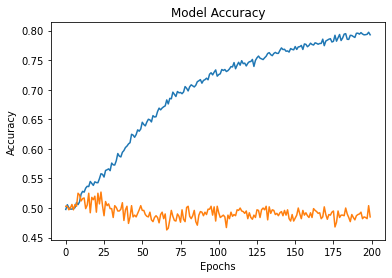

In [49]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

In [50]:
#Save
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model\assets


INFO:tensorflow:Assets written to: chatbot_model\assets
C:\Users\91836\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\91836\anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [51]:
#Evaluation on the test set
model.load_weights("chatbot_model")

In [52]:
pred_results = model.predict(([inputs_test,queries_test]))

In [58]:
test_data[13][0]

['John',
 'moved',
 'to',
 'the',
 'hallway',
 '.',
 'Sandra',
 'went',
 'to',
 'the',
 'bedroom',
 '.',
 'Sandra',
 'travelled',
 'to',
 'the',
 'garden',
 '.',
 'John',
 'got',
 'the',
 'football',
 'there',
 '.',
 'Daniel',
 'went',
 'back',
 'to',
 'the',
 'bedroom',
 '.',
 'Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Mary',
 'went',
 'to',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'went',
 'to',
 'the',
 'hallway',
 '.']

In [63]:
story = ' '.join(word for word in test_data[23][0])
story

'Daniel grabbed the apple there . Mary travelled to the bedroom . Sandra got the milk there . Daniel moved to the hallway . Daniel moved to the bathroom . Mary took the football there . Daniel discarded the apple . Sandra journeyed to the hallway .'

In [64]:
query = ' '.join(word for word in test_data[23][1])
query

'Is Sandra in the bedroom ?'

In [65]:
test_data[23][2]

'no'

In [66]:
val_max = np.argmax(pred_results[23])

for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print("Predicted Answer is: ",k)
print("Probability of certainity: ",pred_results[23][val_max])

Predicted Answer is:  no
Probability of certainity:  0.8009438


In [87]:
story = "Mary dropped the football . Sandra discarded apple in kitchen . Daniel went to office"
story.split()

['Mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen',
 '.',
 'Daniel',
 'went',
 'to',
 'office']

In [88]:
my_question = "Is Daniel in the office ?"
my_question.split()

['Is', 'Daniel', 'in', 'the', 'office', '?']

In [89]:
mydata = [(story.split(),my_question.split(),'yes')]

In [90]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [91]:
pred_results = model.predict((my_story,my_ques))

In [92]:
val_max = np.argmax(pred_results[0])

for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print("Predicted Answer is: ",k)
print("Probability of certainity: ",pred_results[0][val_max])

Predicted Answer is:  yes
Probability of certainity:  0.92410386
